In [ ]:
a = ([
    "00:00:18.28",
"00:00:56.88",
"00:28:23.18",
"00:01:44.26",
"00:02:10.58",
"03:14:17.11",
"00:00:00.47",
"02:30:00.25",
"00:00:10.83",
"00:00:39.29",
"00:08:43.07",
"00:00:59.27",
"00:01:15.37",
"00:27:48.54",
"00:00:00.25",
"00:30:00.25",
"00:00:01.25",
"00:00:21.80",
"00:01:31.25"

])


def getSeconds(x):
    res = x.split(":")
    return int(res[0])*60*60 + int(res[1])*60 + int(res[2].split(".")[0])


res = list(map(lambda x: getSeconds(x),a))
print(res)

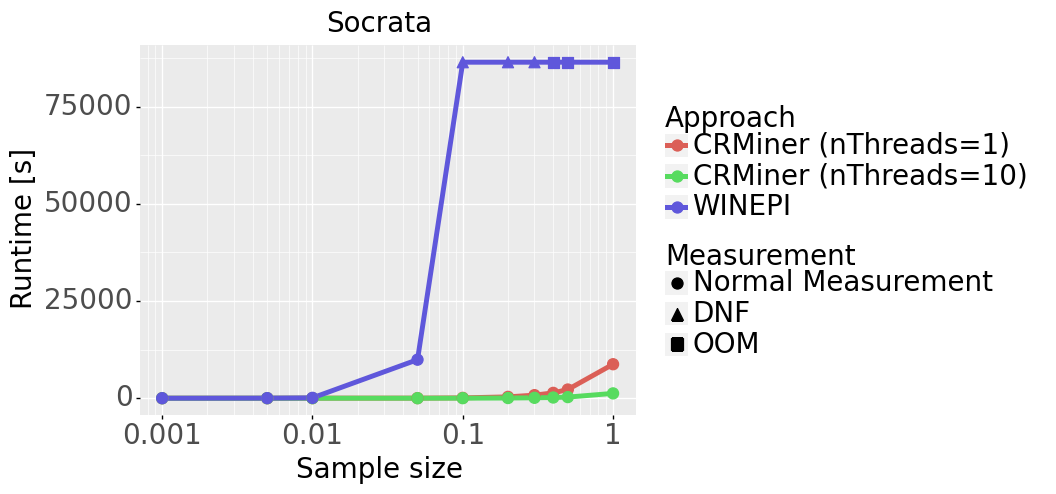

/home/leon/PycharmProjects/EpisodeMining/venv/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/leon/PycharmProjects/EpisodeMining/venv/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/leon/Documents/lehre/ws2021/Master_Project/plots/Socrata.png


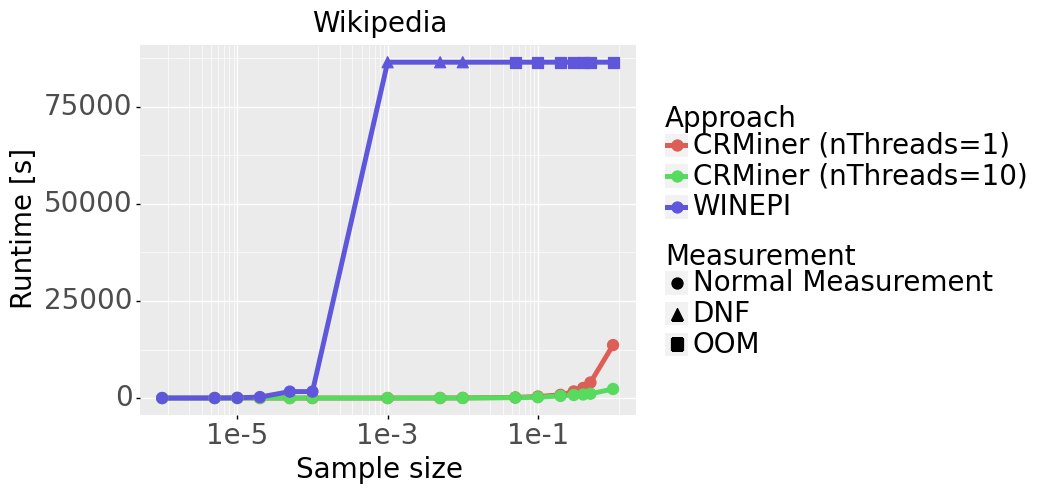

/home/leon/PycharmProjects/EpisodeMining/venv/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/leon/PycharmProjects/EpisodeMining/venv/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/leon/Documents/lehre/ws2021/Master_Project/plots/Wikipedia.png


In [15]:
import pandas as pd
from plotnine import *
from plotnine.data import *
import numpy as np
import math

df = pd.read_csv("/home/leon/Documents/lehre/ws2021/Master_Project/newExperimentsAggregated.csv")


def processRow(d):
    if math.isnan(d['RuntimeInSeconds']):
        return 86400
    else:
        return d['RuntimeInSeconds']


df['Runtime [s]'] = df.apply(lambda d: processRow(d), axis=1)


def getMeasurementState(d):
    if math.isnan(d['RuntimeInSeconds']) and d['WasOutOfMemory']:
        return 'OOM'
    if math.isnan(d['RuntimeInSeconds']) and not d['WasOutOfMemory']:
        return 'DNF'
    else:
        return 'Normal Measurement'


df['Measurement'] = df.apply(lambda d: getMeasurementState(d), axis=1).astype('category')
df['Measurement'] = df['Measurement'].cat.reorder_categories(['Normal Measurement', 'DNF','OOM'])
#print (df)

dfWikipedia = df[df['Dataset']=="wikipedia"]
dfSocrata = df[df['Dataset']=="socrata"]
#print(dfWikipedia)
#print(df.dtypes)


def printPlot(curDF,title):
    plot = (ggplot(curDF, aes(x='Sample size',ymin=0,ymax=86400, y='Runtime [s]',group='Approach',color='Approach',shape='Measurement'))
      + geom_line(size=2.0)
      + geom_point(size=4)
      + scale_x_log10()
      #+ scale_y_log10()
      + theme(text=element_text(size=20))
      #+ theme(axis_text_x=element_text(size=12),axis_text_y=element_text(size=12))
      + labs(title=title))
    print(plot)
    path= "/home/leon/Documents/lehre/ws2021/Master_Project/plots/" + title + ".png"
    plot.save(path)

printPlot(dfSocrata,"Socrata")
printPlot(dfWikipedia,"Wikipedia")
#,shape="datasource", line='datasource'